## Analysis of the mentorship predictions of all authors in Semantic Scholar

The purpose of the notebook is to understand and visualize the distribution of various metrics in correlation with mentorship score. This will lead to insights which might be useful for the paper.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.pyplot import figure
import plotly.express as px


### Mentorship Graph:

- Nodes - `mentor` and `mentee`
- Edges - directional edges from senior author (`mentor`) to junior author (`mentee`)
- Edge weight - prediction probability for a mentor-mentee pair 
    - `mentorship_score` for that pair (`pred_prob`)
    - high edge weight means a significant mentorship relationship between the pair

A `mentor` has out edges to each `mentee`

`mentorship_score`:
- Sum of all the out edge weights of a mentor node

`mentorship_score_mean`:
- mean of all the out edge weights of a mentor node

`mentorship_score_median` :
- median of all the out edge weights of a mentor node

`mentee_count` :
- number of mentees of a mentor
- out degree of mentor node

Field of study (`fos`) :
- Field of study of the mentor


`h-index` is the h-index of the mentor

In [2]:
#!aws s3 cp --no-sign-request s3://ai2-s2-research-public/s2amp/inferred/mentors_s2_fos_scores.csv data/inferred/mentors_s2_fos_scores.csv

In [3]:
df_mentors = pd.read_csv('data/inferred/mentors_s2_fos_scores.csv')

In [4]:
df_mentors

authors_ai2_id  h_index  paper_count  citation_count  \
0               2562240       31          347            3730   
1              20772242        3           22              48   
2               6402240        8           12             172   
3              48852240        6           27              62   
4              15018242        4           45              69   
...                 ...      ...          ...             ...   
9371015      2118403769        5           20             191   
9371016      2110679076       13           39            1063   
9371017      2111009961        2            6              21   
9371018      2109738049       15           33            1071   
9371019      2115257611        2            5              25   

                      affiliations  mentorship_score  mentorship_score_mean  \
0                              NaN         63.163338               0.371549   
1        ["University of Kashmir"]          0.484438               0.242219   
2                              NaN          0.046127               0.046127   
3                              NaN          3.916424               0.652737   
4                              NaN          0.835011               0.139169   
...                            ...               ...                    ...   
9371015                        NaN          0.458033               0.229016   
9371016               ["Novartis"]          1.726746               0.345349   
9371017                        NaN          0.280124               0.280124   
9371018                        NaN          0.090947               0.006996   
9371019                        NaN          0.071483               0.023828   

         menteeship_score  menteeship_score_mean  mentee_count  mentor_count  \
0                0.947075               0.094707           170            10   
1                2.146073               0.536518             2             4   
2                2.988159               0.747040             1             4   
3                0.783597               0.783597             6             1   
4                1.210539               0.201757             6             6   
...                   ...                    ...           ...           ...   
9371015          1.508733               0.215533             2             7   
9371016          4.071905               0.290850             5            14   
9371017          1.832399               0.458100             1             4   
9371018          2.448788               0.204066            13            12   
9371019          2.634749               0.526950             3             5   

                      fos  log_mentee_count  
0                 Physics          7.409391  
1                 Biology          1.000000  
2                 Biology          0.000000  
3               Chemistry          2.584963  
4               Education          2.584963  
...                   ...               ...  
9371015  Computer Science          1.000000  
9371016  Computer Science          2.321928  
9371017  Computer Science          0.000000  
9371018  Computer Science          3.700440  
9371019  Computer Science          1.584963  

[9371020 rows x 13 columns]

In [5]:
df_mentors['log_paper_count'] = np.log2(df_mentors['paper_count'])
df_mentors['log_mentee_count'] = np.log2(df_mentors['mentee_count'])
df_mentors['log_mentorship_score'] = np.log2(df_mentors['mentorship_score'])
df_mentors

authors_ai2_id  h_index  paper_count  citation_count  \
0               2562240       31          347            3730   
1              20772242        3           22              48   
2               6402240        8           12             172   
3              48852240        6           27              62   
4              15018242        4           45              69   
...                 ...      ...          ...             ...   
9371015      2118403769        5           20             191   
9371016      2110679076       13           39            1063   
9371017      2111009961        2            6              21   
9371018      2109738049       15           33            1071   
9371019      2115257611        2            5              25   

                      affiliations  mentorship_score  mentorship_score_mean  \
0                              NaN         63.163338               0.371549   
1        ["University of Kashmir"]          0.484438               0.242219   
2                              NaN          0.046127               0.046127   
3                              NaN          3.916424               0.652737   
4                              NaN          0.835011               0.139169   
...                            ...               ...                    ...   
9371015                        NaN          0.458033               0.229016   
9371016               ["Novartis"]          1.726746               0.345349   
9371017                        NaN          0.280124               0.280124   
9371018                        NaN          0.090947               0.006996   
9371019                        NaN          0.071483               0.023828   

         menteeship_score  menteeship_score_mean  mentee_count  mentor_count  \
0                0.947075               0.094707           170            10   
1                2.146073               0.536518             2             4   
2                2.988159               0.747040             1             4   
3                0.783597               0.783597             6             1   
4                1.210539               0.201757             6             6   
...                   ...                    ...           ...           ...   
9371015          1.508733               0.215533             2             7   
9371016          4.071905               0.290850             5            14   
9371017          1.832399               0.458100             1             4   
9371018          2.448788               0.204066            13            12   
9371019          2.634749               0.526950             3             5   

                      fos  log_mentee_count  log_paper_count  \
0                 Physics          7.409391         8.438792   
1                 Biology          1.000000         4.459432   
2                 Biology          0.000000         3.584963   
3               Chemistry          2.584963         4.754888   
4               Education          2.584963         5.491853   
...                   ...               ...              ...   
9371015  Computer Science          1.000000         4.321928   
9371016  Computer Science          2.321928         5.285402   
9371017  Computer Science          0.000000         2.584963   
9371018  Computer Science          3.700440         5.044394   
9371019  Computer Science          1.584963         2.321928   

         log_mentorship_score  
0                    5.981016  
1                   -1.045616  
2                   -4.438240  
3                    1.969537  
4                   -0.260132  
...                       ...  
9371015             -1.126478  
9371016              0.788056  
9371017             -1.835860  
9371018             -3.458831  
9371019             -3.806263  

[9371020 rows x 15 columns]

In [9]:
df_mentors.sample(n=100000, random_state=2)

authors_ai2_id  h_index  paper_count  citation_count  \
8198406       144906163        6           82             187   
905695         46578846        8           34             552   
1757135        31904437        5           16              64   
4673111         6995996       14           28             743   
6261870        88229109        2            7               8   
...                 ...      ...          ...             ...   
6416861        93110985        0            1               0   
1856281         4832073       21           48            1486   
161333          6042358        1            5               4   
5954815        87225716        1            6               4   
4808117        51997260        1           36               1   

                                              affiliations  mentorship_score  \
8198406                    ["Northeast Normal University"]          2.808951   
905695                                                 NaN          2.384189   
1757135                                                NaN          0.408619   
4673111                       ["Blaise Pascal University"]          0.089003   
6261870                                                NaN          0.017446   
...                                                    ...               ...   
6416861                                                NaN          0.111461   
1856281  ["Institute of Biochemistry and Biophysics, Po...         15.526601   
161333   ["Laboratory of Swimming and Water Lifesaving,...          0.186727   
5954815                                                NaN          0.162221   
4808117                                                NaN         11.232941   

         mentorship_score_mean  menteeship_score  menteeship_score_mean  \
8198406               0.280895          1.431177               0.477059   
905695                0.340598          0.274725               0.274725   
1757135               0.051077          2.043795               0.340632   
4673111               0.044502          5.778299               0.481525   
6261870               0.017446          1.038826               0.519413   
...                        ...               ...                    ...   
6416861               0.037154          1.684144               0.842072   
1856281               0.443617          2.243746               0.373958   
161333                0.093363          1.364832               0.682416   
5954815               0.162221          0.596870               0.119374   
4808117               0.702059          1.302460               0.325615   

         mentee_count  mentor_count                             fos  \
8198406            10             3  Agricultural And Food Sciences   
905695              7             1                        Medicine   
1757135             8             6                        Medicine   
4673111             2            12               Materials Science   
6261870             1             2           Environmental Science   
...               ...           ...                             ...   
6416861             3             2                       Chemistry   
1856281            35             6                         Biology   
161333              2             2                        Medicine   
5954815             1             5                        Medicine   
4808117            16             4                         Biology   

         log_mentee_count  log_paper_count  log_mentorship_score  
8198406          3.321928         6.357552              1.490032  
905695           2.807355         5.087463              1.253498  
1757135          3.000000         4.000000             -1.291172  
4673111          1.000000         4.807355             -3.490001  
6261870          0.000000         2.807355             -5.840941  
...                   ...              ...                   ...  
6416861          1.584963         0.000000  

### Examining some authors for sanity check

Trying to find the actual profiles of the mentors identified with really high scores according to our model.

Looking at the graph below(for different feild of studies) and searching for the actual authors -

Author profile (Chemistry) 

- Name : Leo Paquette
- Semantic scholar home page : https://www.semanticscholar.org/author/L.-Paquette/94245449
- Wikipedia : https://en.wikipedia.org/wiki/Leo_Paquette
- Mentorship score : 272.44

**"Paquette had authored more than 1000 papers, 38 book chapters, and 17 books, and had guided approximately 150 graduate students to their Ph.D. degrees." - Wikipedia**

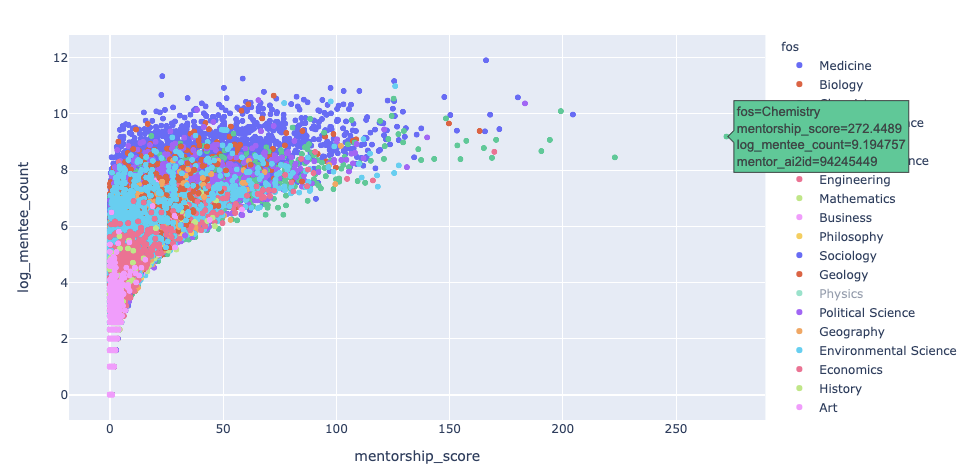

In [5]:
Image(filename = "chemistry.png")

Author profile (Medicine) 

- Name : Yuen Kwok-yung
- Semantic scholar home page : https://www.semanticscholar.org/author/K.-Yuen/145537748
- Wikipedia : https://en.wikipedia.org/wiki/Yuen_Kwok-yung
- Mentorship score : 204.6

**"He led a team identifying the SARS coronavirus that caused the SARS pandemic of 2003–4, and traced its genetic origins to wild bats. During the ongoing COVID-19 pandemic, he has acted as expert adviser to the Hong Kong government." - Wikipedia**

In [22]:
fig = px.scatter(df_mentors.sample(n=100000, random_state=2)[df_mentors['fos']=='Medicine'], 
                 x="mentorship_score", 
                 y="h_index", 
                 color="fos",
                 hover_data=['authors_ai2_id'])
fig.show()

/net/nfs2.s2-research/shaurya/sw/miniconda3/envs/scrapy/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



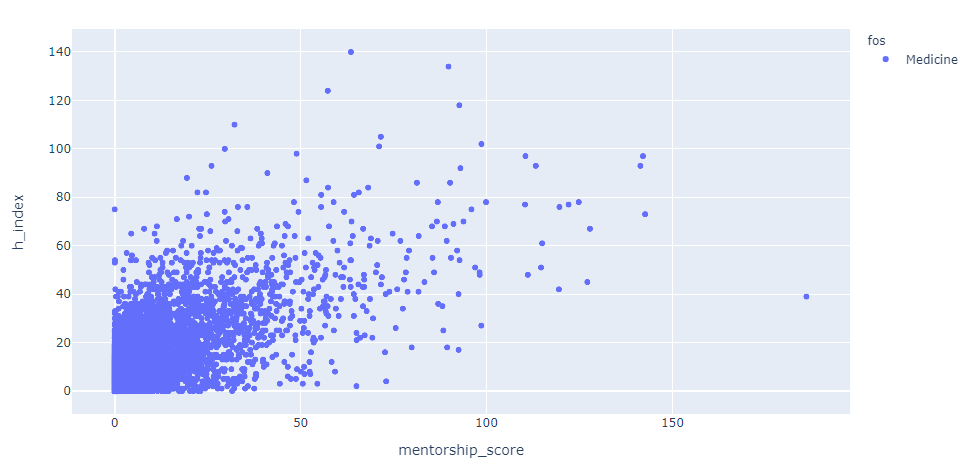

In [24]:
Image(filename = "medicine.png")

Author profile (Economics) 

- Name : Peter Nijkamp
- Semantic scholar home page : https://www.semanticscholar.org/author/P.-Nijkamp/2965486
- Wikipedia : https://en.wikipedia.org/wiki/Peter_Nijkamp
- Mentorship score : 169.8

**"He is ranked among the top 100 economists[1] in the world according to IDEAS/RePEc, and is by far the most prolific economist" - Wikipedia**

In [23]:
fig = px.scatter(df_mentors.sample(n=100000, random_state=2)[df_mentors['fos']=='Economics'], 
                 x="mentorship_score", 
                 y="h_index", 
                 color="fos",
                 hover_data=['authors_ai2_id'])
fig.show()

/net/nfs2.s2-research/shaurya/sw/miniconda3/envs/scrapy/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



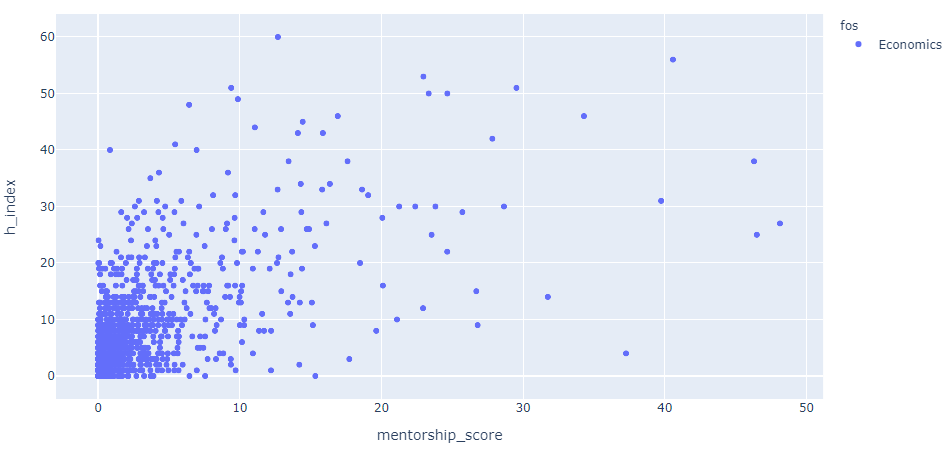

In [25]:
Image(filename = "economics.png")

Author profile (Computer Science - Electrical Engineering) 

- Name : Kaushik Roy 
- Semantic scholar home page : https://www.semanticscholar.org/author/K.-Roy/143884690
- Wikipedia : https://en.wikipedia.org/wiki/Kaushik_Roy
- Mentorship score : 127.2

**"He has supervised 91 Ph.D. dissertations and co-authored two books on Low Power CMOS VLSI Design (John Wiley & McGraw Hill)" - Wikipedia**

### It looks like the model is learning something and is actually able to identify the prominent contributers in an area. 

## Correlation with other author metrics

Lets look at the correlation between other author metrics and mentorship score.

<AxesSubplot:>

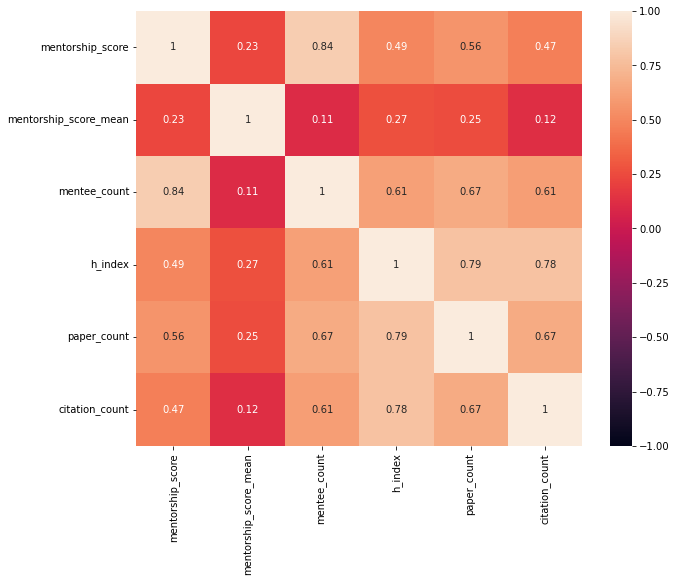

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_mentors[['mentorship_score', 'mentorship_score_mean',
       'mentee_count', 'h_index', 'paper_count',
       'citation_count']].corr(), vmin=-1, vmax=1, annot=True)

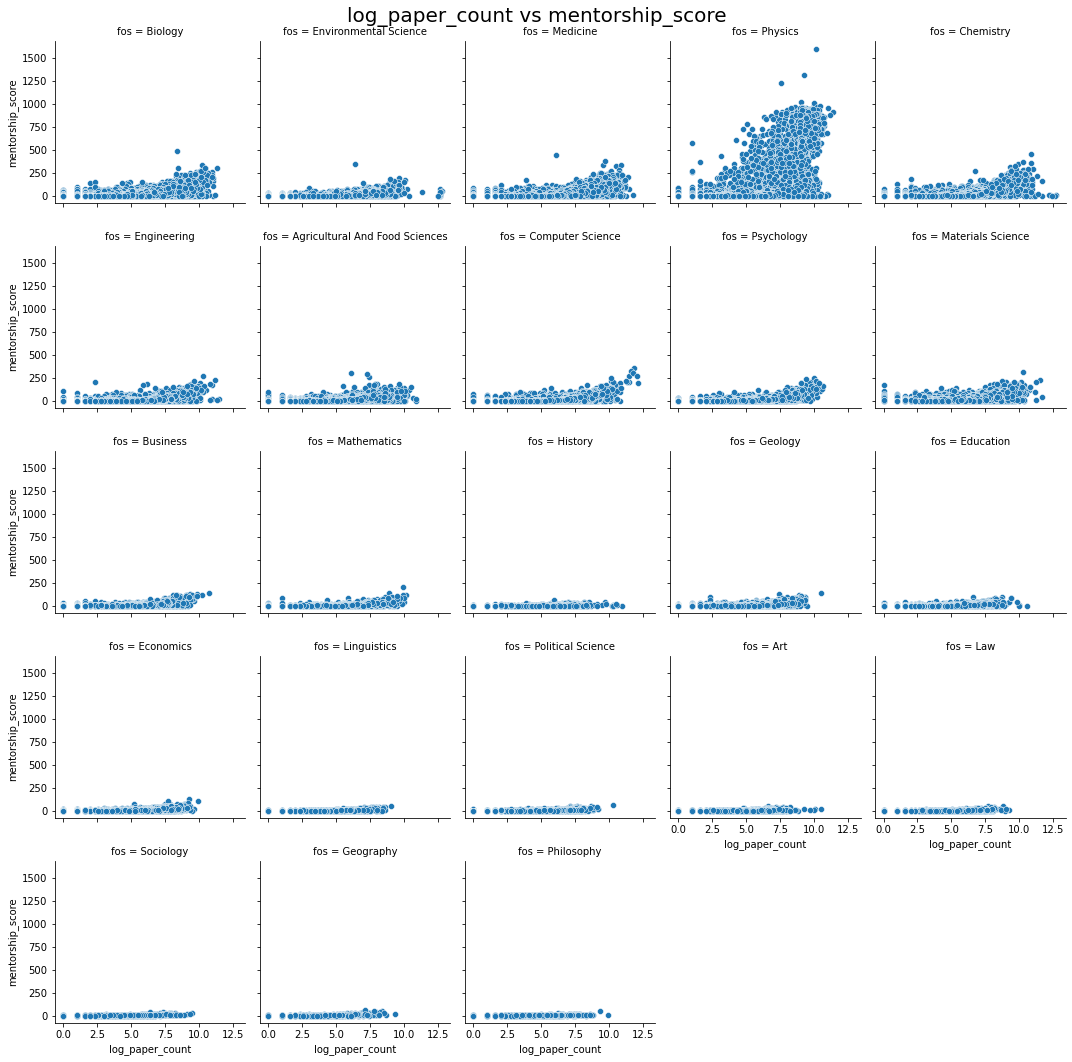

In [24]:
g = sns.FacetGrid(df_mentors, col="fos",col_wrap=5)
g.fig.suptitle('log_paper_count vs mentorship_score', fontsize=20)
g.map(sns.scatterplot, "log_paper_count", "mentorship_score")

### In which field of study mentorship scores are marginally different from others?

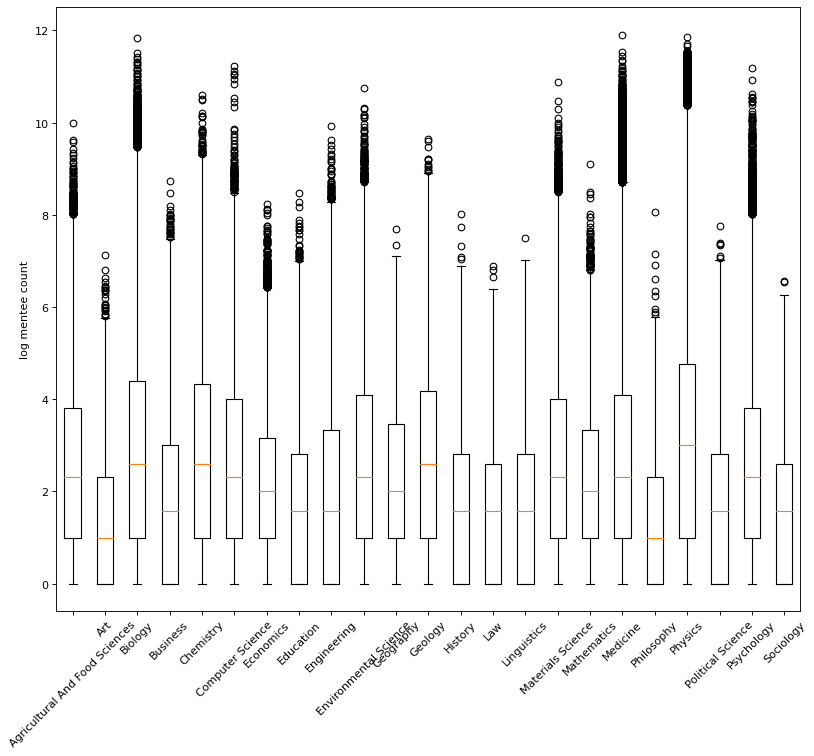

In [23]:
df_mentee_count = (
        df_mentors.groupby("fos")["log_mentee_count"]
        .apply(list)
        .reset_index(name="mentee_count_list")
    )

dict_count = df_mentee_count.set_index('fos')['mentee_count_list'].to_dict()
figure(figsize=(12, 10), dpi=80)
labels, data = [*zip(*dict_count.items())]  

labels, data = dict_count.keys(), dict_count.values()

plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels, rotation = 45)
plt.ylabel('log mentee count')
plt.show()

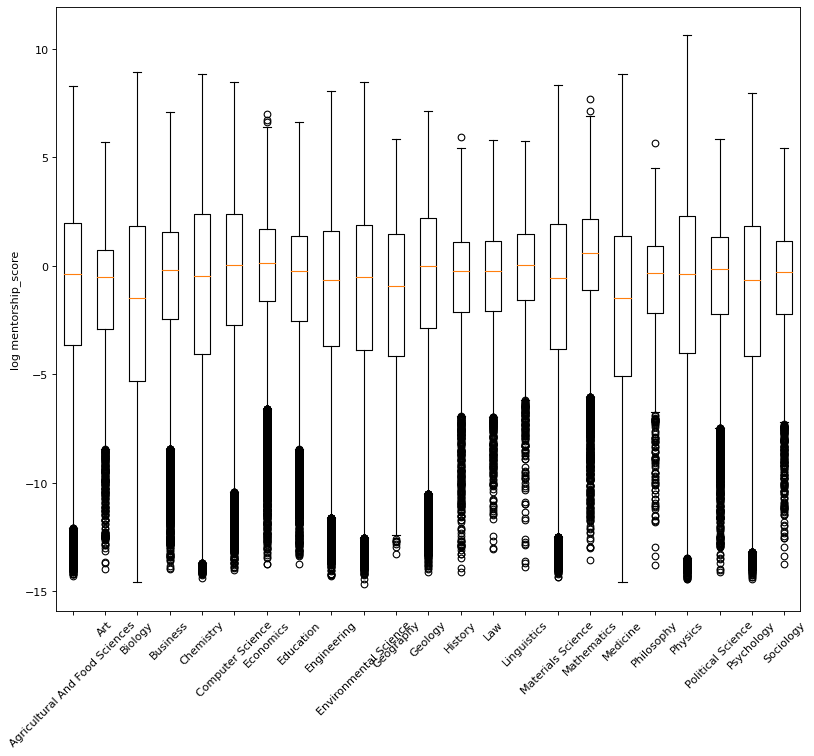

In [28]:
df_mentee_count = (
        df_mentors.groupby("fos")["log_mentorship_score"]
        .apply(list)
        .reset_index(name="log_mentorship_score_list")
    )

dict_count = df_mentee_count.set_index('fos')['log_mentorship_score_list'].to_dict()
figure(figsize=(12, 10), dpi=80)
labels, data = [*zip(*dict_count.items())]  

labels, data = dict_count.keys(), dict_count.values()

plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels, rotation = 45)
plt.ylabel('log mentorship_score')
plt.show()

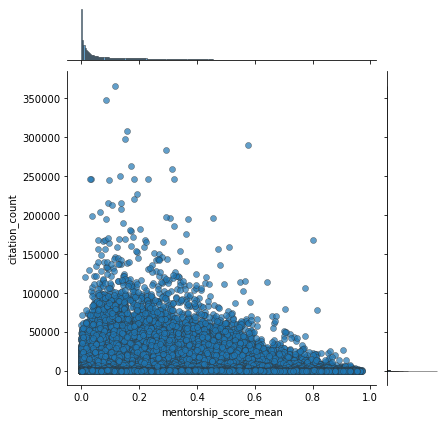

In [34]:
g = sns.JointGrid(data=df_mentors, x="mentorship_score_mean", y="citation_count")
g.plot(sns.scatterplot, sns.histplot, alpha=.7, edgecolor=".2", linewidth=.5)